## Logistic Regression - Diabetes

#### Given some previous observations for diabetes in the Indian female population, can we predict the chance of a woman to acquire the disease?

### Setup

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

from altair import Chart, Color, Scale

import seaborn as sns
import cufflinks as cf

# special matplotlib argument for improved plots
from matplotlib import rcParams


In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

### Dataset

In [5]:
df=pd.read_csv('diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### Statistical information

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Correlation to the target

In [7]:
df.corr()[['Outcome']]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


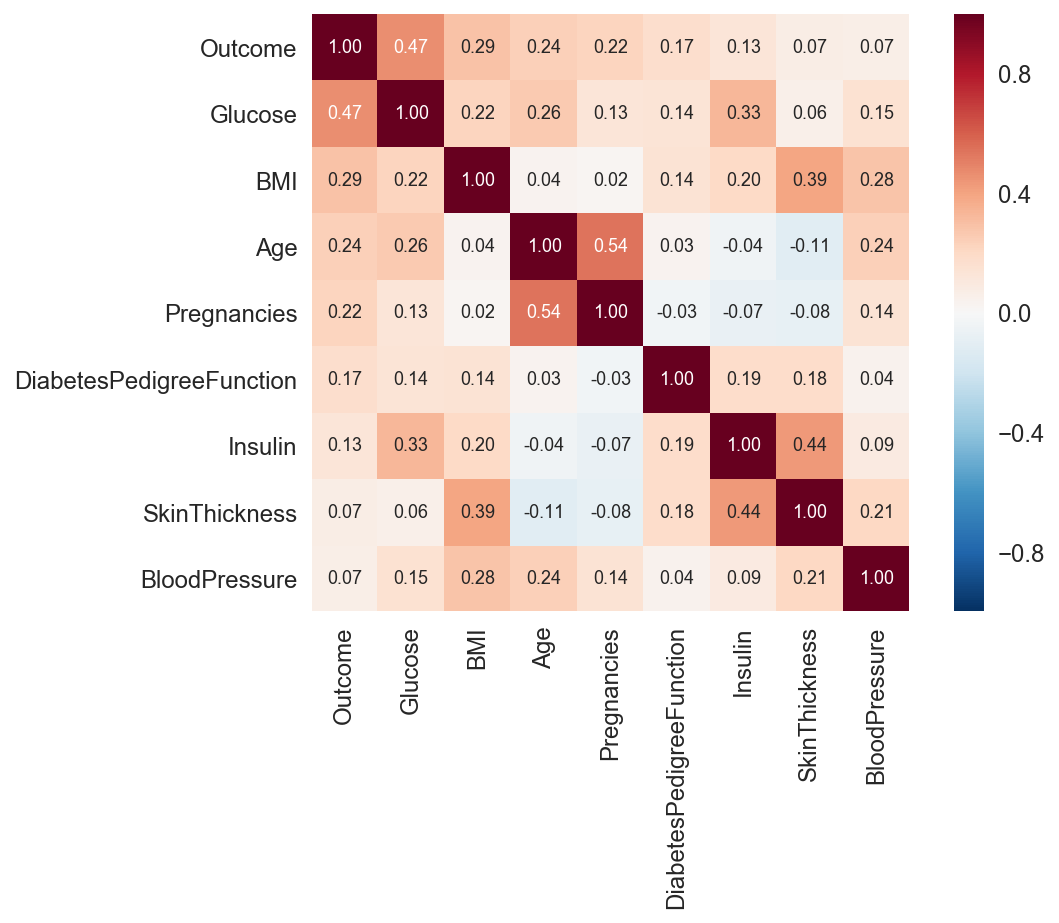

In [8]:
n=len(df.columns) # n= no. of variables
corrmat = df.corr()
cols = corrmat.nlargest(n, 'Outcome')['Outcome'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Glucose level, BMI, Age and Pregnancies seem to have the higher correlation to the target. 

#### Outcome x Glucose

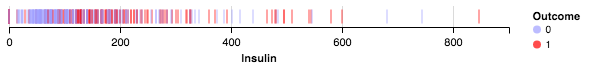

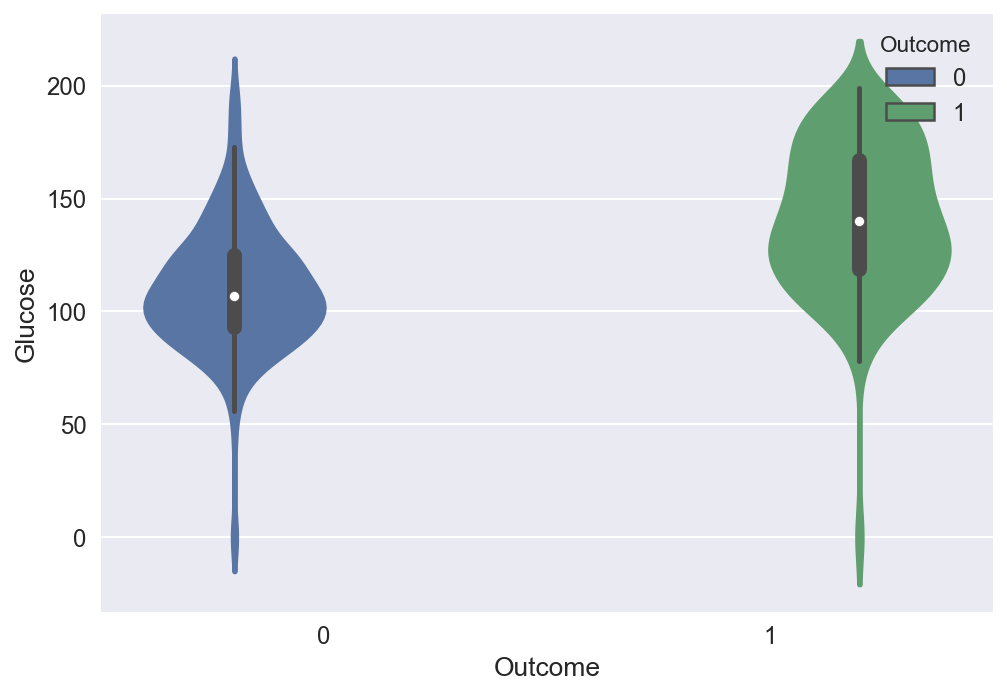

In [10]:
sns.violinplot(x=df["Outcome"], y=df["Glucose"], hue=df['Outcome'], linewidth=2.5)

Chart(df).mark_tick().encode(
    x='Insulin', 
    color=Color('Outcome:N', scale=Scale(range=['#A0A0FF', '#FF0000']))
)

#### Outcome x BMI

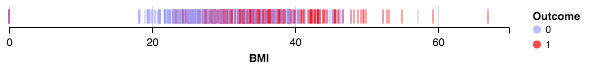

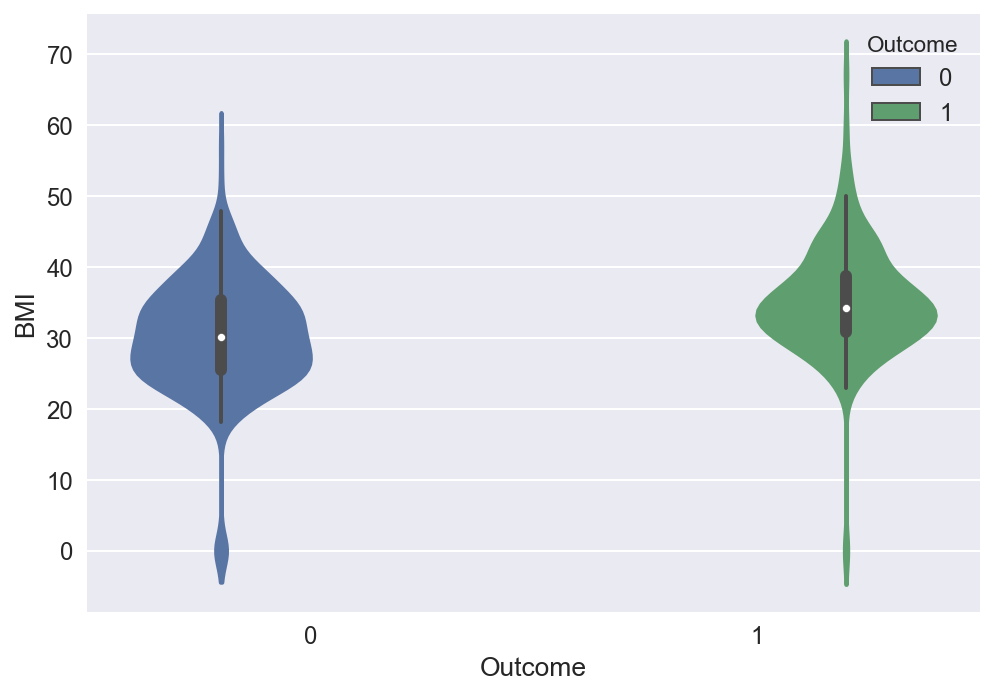

In [11]:
sns.violinplot(x=df["Outcome"], y=df["BMI"], hue=df['Outcome'],linewidth=2)

Chart(df).mark_tick().encode(
    x='BMI', 
    color=Color('Outcome:N', scale=Scale(range=['#A0A0FF', '#FF0000']))
)

#### Outcome x Age

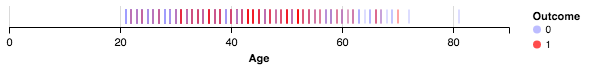

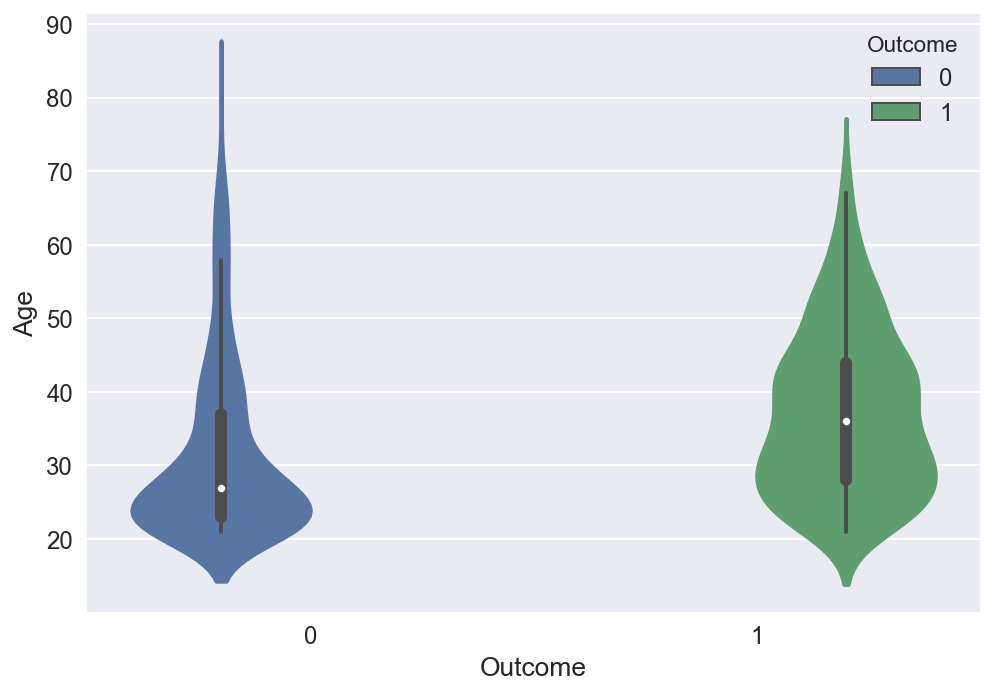

In [13]:
sns.violinplot(x=df["Outcome"], y=df["Age"], hue=df['Outcome'],linewidth=2)

Chart(df).mark_tick().encode(
    x='Age', 
    color=Color('Outcome:N', scale=Scale(range=['#A0A0FF', '#FF0000']))
)

#### Outcome x Pregnancies

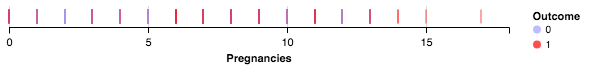

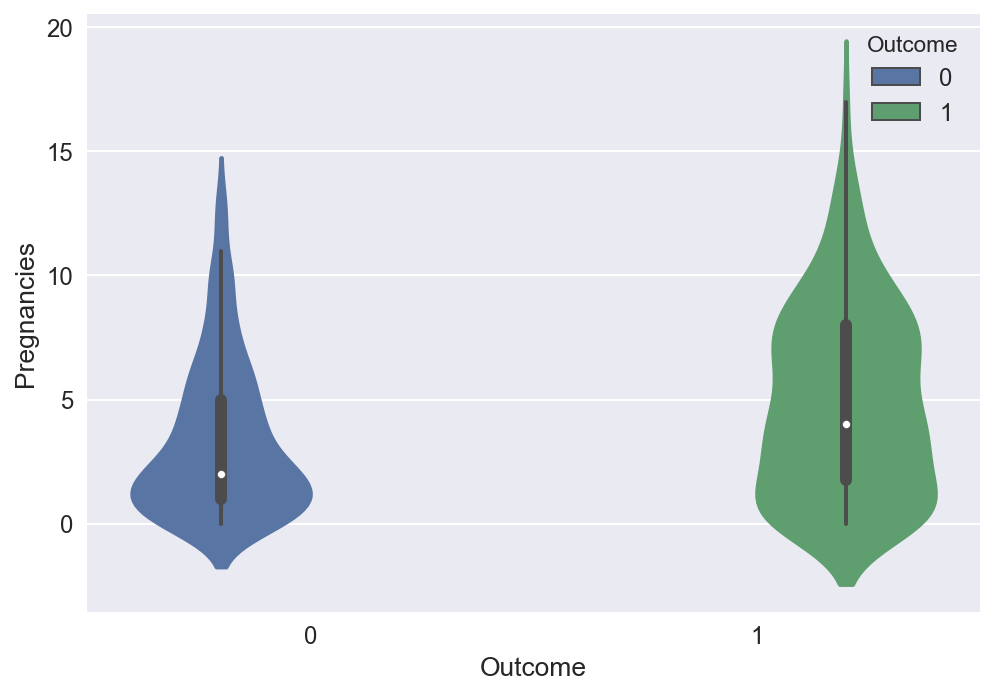

In [15]:
sns.violinplot(x=df["Outcome"], y=df["Pregnancies"], hue=df['Outcome'],linewidth=2)

Chart(df).mark_tick().encode(
    x='Pregnancies', 
    color=Color('Outcome:N', scale=Scale(range=['#A0A0FF', '#FF0000']))
)

### Logistic regression

In [44]:
X=df[['Glucose','BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']].values
y=df['Outcome'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

0.75196850393700787

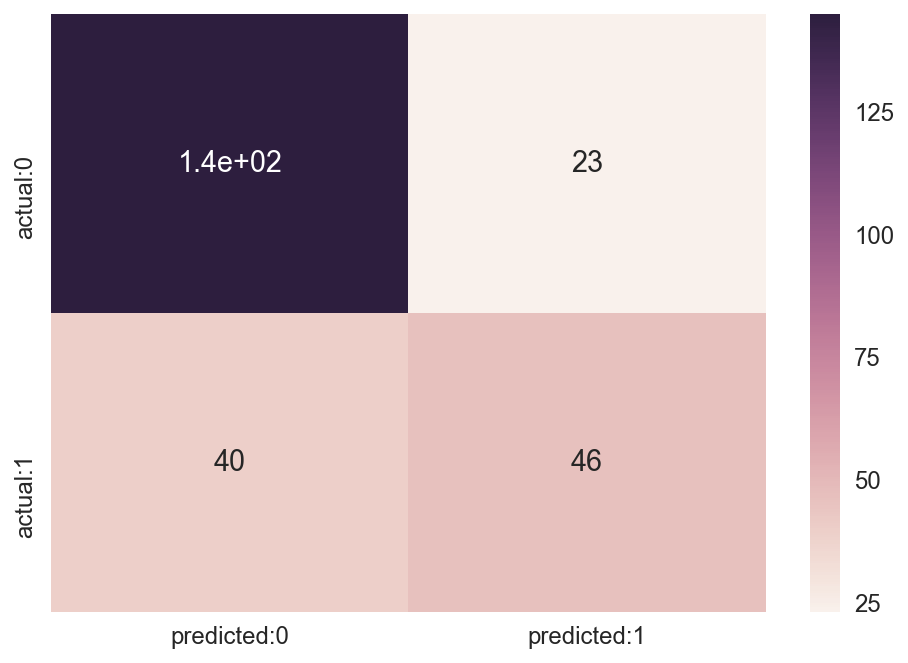

In [46]:
from sklearn.metrics import confusion_matrix
y_predicted = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

df_cm = pd.DataFrame(cm, index=["actual:0","actual:1"], columns=["predicted:0","predicted:1"])
sns.heatmap(df_cm, annot=True)